In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
sharer_df = pd.read_csv('data/vebay69/clean/sharers_full.csv')

In [3]:
sharer_df.shape

(18942, 4)

In [4]:
sharer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18942 entries, 0 to 18941
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       18942 non-null  object
 1   link       18942 non-null  object
 2   post_id    18942 non-null  int64 
 3   sharer_id  18942 non-null  object
dtypes: int64(1), object(3)
memory usage: 592.1+ KB


In [5]:
sharer_df.head(5)

,name,link,post_id,sharer_id
0,Trong Huy Bui,https://facebook.com/profile.php?id=1000895265...,617018593866682,100089526577350
1,Long Dinh,https://facebook.com/profile.php?id=1000571749...,617018593866682,100057174918557
2,Subhajit Das Subhajit,https://facebook.com/subhajitdas.subhajit.7?ea...,617018593866682,subhajitdas.subhajit.7
3,Kiều Minh Thu,https://facebook.com/profile.php?id=1000918233...,617018593866682,100091823392743
4,Anh Khoa La,https://facebook.com/profile.php?id=1000901434...,617018593866682,100090143478442


## Ai là người chia sẻ nhiều bài đăng nhất ?

In [16]:
number_posts = sharer_df.groupby('sharer_id').count().sort_values('name', ascending=False)['name']
number_posts.head(10)

sharer_id
tamphuc4898        97
tranxuanbong       58
hiep.truongviet    58
100010671526055    38
100008413214141    36
phucphuc06         36
oceanus159         33
pin.melody856      29
manhk58qla         28
meanwhile000       27
Name: name, dtype: int64

## Có bao nhiêu posts trong bộ dữ liệu sharers

In [18]:
len(sharer_df['post_id'].unique())

822

## Mỗi post tương ứng có bao nhiêu lượt share

In [22]:
number_sharer = sharer_df.groupby('post_id').count().sort_values('name', ascending=False)['name']
number_sharer.head(10)

post_id
5663428510443960    3580
683467500555124      383
6380690005384470     344
6203152083138264     339
6291401437646661     278
6019701001483374     253
5716308235155987     239
633151265586748      230
646578170910724      228
6159407180846088     192
Name: name, dtype: int64

## Họ tên phổ biến trong dữ liệu tên của các sharer

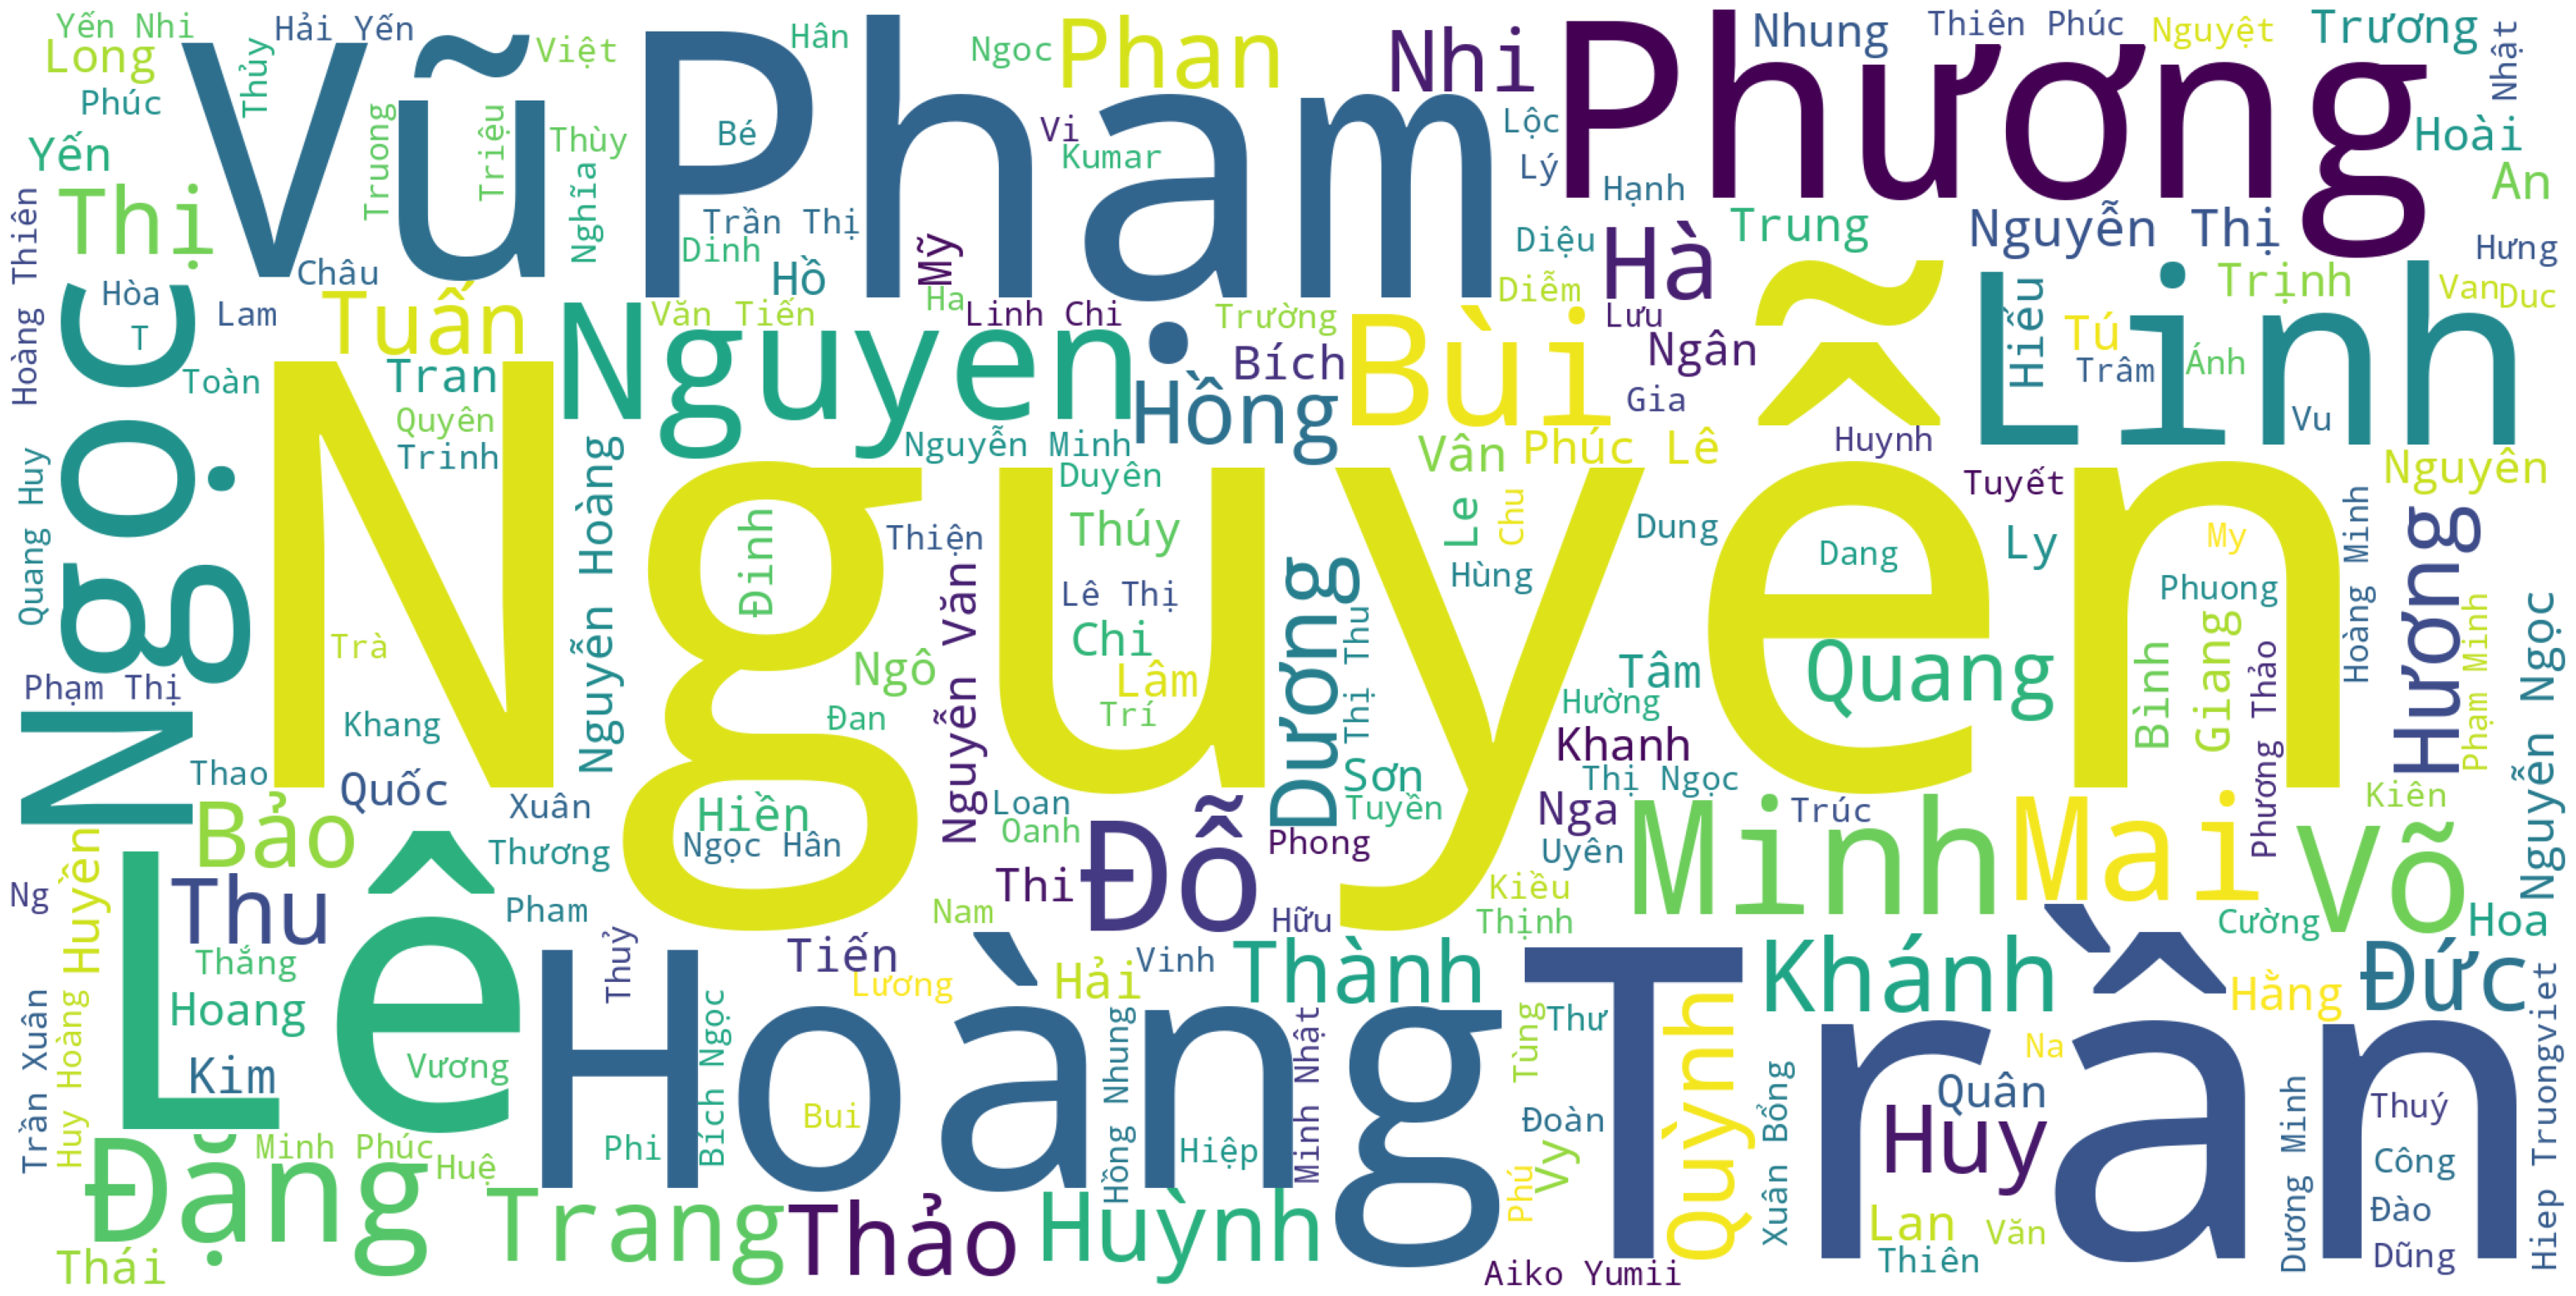

In [21]:
from wordcloud import WordCloud
# Danh sách các stopwords Tiếng Việt
stopwords = set(open('data/other/vietnamese-stopwords.txt', mode='r', encoding='utf-8').read().splitlines())
name_text = ' '.join(sharer_df['name'])
wordcloud = WordCloud(
    stopwords=stopwords, 
    background_color='white', 
    width=2000, 
    height=1000).generate(name_text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()